In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
data=pd.read_csv("Listings.csv", encoding="ISO-8859-1")
data.head()

/Users/atefajmal/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [3]:
list(data.columns)

['listing_id',
 'name',
 'host_id',
 'host_since',
 'host_location',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'district',
 'city',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bedrooms',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable']

In [4]:
data.instant_bookable.unique()

array(['f', 't'], dtype=object)

In [5]:
ins_bookable_num = {'f': 0,'t': 10}

data.instant_bookable = [ins_bookable_num[item] for item in data.instant_bookable]

In [6]:
corr_data= data[['review_scores_rating', 'review_scores_cleanliness', 'review_scores_location', 'instant_bookable','review_scores_communication']]

In [7]:
correlation=corr_data.corr()
correlation

,review_scores_rating,review_scores_cleanliness,review_scores_location,instant_bookable,review_scores_communication
review_scores_rating,1.000000,0.740594,0.540717,-0.077902,0.709482
review_scores_cleanliness,0.740594,1.000000,0.430433,-0.029612,0.540806
review_scores_location,0.540717,0.430433,1.000000,-0.036123,0.520654
instant_bookable,-0.077902,-0.029612,-0.036123,1.000000,-0.071205
review_scores_communication,0.709482,0.540806,0.520654,-0.071205,1.000000


<AxesSubplot:>

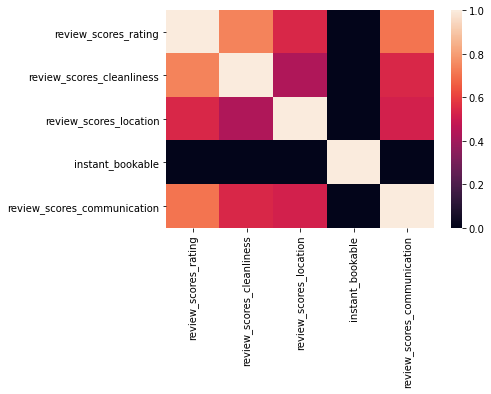

In [8]:
sns.heatmap(correlation, vmin=0, vmax=1)

In [9]:
df=data[['city','neighbourhood','review_scores_rating', 'review_scores_cleanliness', 'review_scores_location', 'instant_bookable','review_scores_communication', 'latitude', 'longitude']]

In [10]:
df.head()

,city,neighbourhood,review_scores_rating,review_scores_cleanliness,review_scores_location,instant_bookable,review_scores_communication,latitude,longitude
0,Paris,Buttes-Montmartre,100.0,10.0,10.0,0,10.0,48.88668,2.33343
1,Paris,Buttes-Montmartre,100.0,10.0,10.0,0,10.0,48.88617,2.34515
2,Paris,Elysee,100.0,10.0,10.0,0,10.0,48.88112,2.31712
3,Paris,Vaugirard,100.0,10.0,10.0,0,10.0,48.84571,2.30584
4,Paris,Passy,100.0,10.0,10.0,0,10.0,48.85500,2.26979


In [11]:
df['freq']=df.groupby(by='neighbourhood')['neighbourhood'].transform('count')
df.head()

<ipython-input-11-bdbb059dad90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['freq']=df.groupby(by='neighbourhood')['neighbourhood'].transform('count')


,city,neighbourhood,review_scores_rating,review_scores_cleanliness,review_scores_location,instant_bookable,review_scores_communication,latitude,longitude,freq
0,Paris,Buttes-Montmartre,100.0,10.0,10.0,0,10.0,48.88668,2.33343,7237
1,Paris,Buttes-Montmartre,100.0,10.0,10.0,0,10.0,48.88617,2.34515,7237
2,Paris,Elysee,100.0,10.0,10.0,0,10.0,48.88112,2.31712,1768
3,Paris,Vaugirard,100.0,10.0,10.0,0,10.0,48.84571,2.30584,4826
4,Paris,Passy,100.0,10.0,10.0,0,10.0,48.85500,2.26979,3215


In [12]:
df= df[(df.freq >= 5)]

In [13]:
cleanliness_avg=df.groupby(["city", "neighbourhood"], as_index=False)["review_scores_cleanliness", "review_scores_communication", "review_scores_rating", "latitude", "longitude","freq"].mean()

<ipython-input-13-96d19bea832d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cleanliness_avg=df.groupby(["city", "neighbourhood"], as_index=False)["review_scores_cleanliness", "review_scores_communication", "review_scores_rating", "latitude", "longitude","freq"].mean()


In [14]:
cleanliness_avg.head()

,city,neighbourhood,review_scores_cleanliness,review_scores_communication,review_scores_rating,latitude,longitude,freq
0,Bangkok,Bang Bon,10.000000,10.000000,100.000000,13.666889,100.403829,7
1,Bangkok,Bang Kapi,9.209790,9.584507,92.615385,13.760419,100.630423,332
2,Bangkok,Bang Khae,8.576923,8.692308,83.851852,13.709909,100.397725,103
3,Bangkok,Bang Khen,9.412698,9.476190,92.158730,13.870921,100.616914,148
4,Bangkok,Bang Kho laen,9.505618,9.719101,93.303371,13.699798,100.511413,154


In [15]:
cleanliness_df = cleanliness_avg[(cleanliness_avg.review_scores_cleanliness <= 8) & (cleanliness_avg.review_scores_communication <= 8)]

In [16]:
cleanliness_df

,city,neighbourhood,review_scores_cleanliness,review_scores_communication,review_scores_rating,latitude,longitude,freq
44,Bangkok,Thawi Watthana,7.500000,7.250000,72.000000,13.783896,100.364224,18
72,Cape Town,Ward 22,6.000000,7.600000,44.000000,-33.945927,18.612143,15
117,Cape Town,Ward 92,7.750000,7.750000,75.000000,-34.045617,18.660383,6
469,Rio de Janeiro,Pedra de Guaratiba,6.750000,8.000000,73.750000,-23.002826,-43.636747,9
490,Rio de Janeiro,Santissimo,7.333333,7.333333,73.333333,-22.874039,-43.524382,9


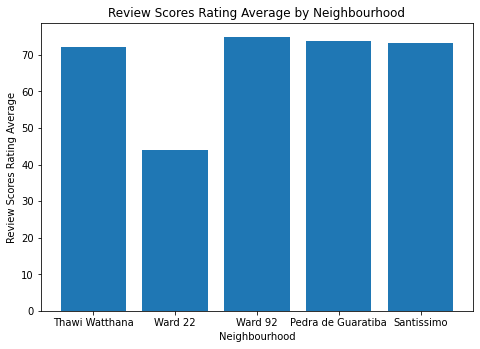

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cleanliness_df.neighbourhood,cleanliness_df.review_scores_rating)
ax.set_ylabel('Review Scores Rating Average')
ax.set_xlabel('Neighbourhood')
ax.set_title('Review Scores Rating Average by Neighbourhood')
plt.show()

In [18]:
cloud_data= data[['amenities','review_scores_rating']]

In [19]:
high_cloud_data = cloud_data[(cloud_data.review_scores_rating >= 90)]

In [20]:
comment_words = ''
stopwords = set(STOPWORDS)

In [32]:
for val in high_cloud_data.amenities:
      
    val = str(val)
  
    tokens = val.split()
      
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1200, height = 600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

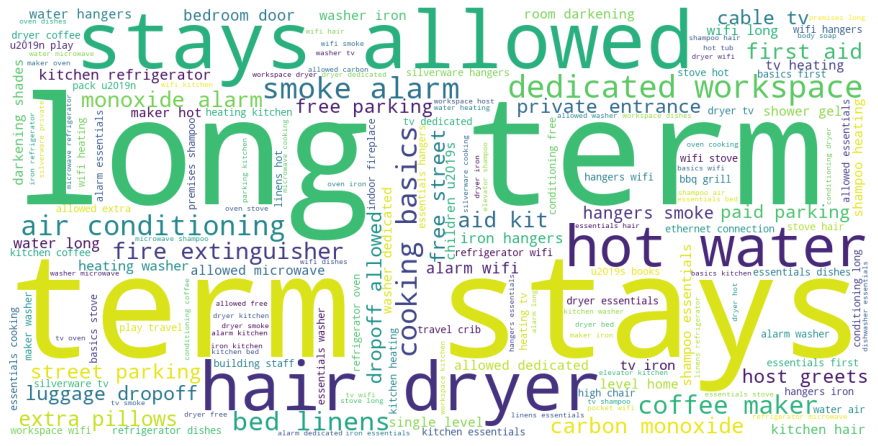

In [38]:
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()